# Artificial Neuron - Binary Classification | Practical Session Part III

## 1 Introduction

From the first two notebooks of this practical session, you will be familiar with basic tensorflow functionalities. Additionally, you have also learned how to conduct a linear regression in three dimensions by means of an artificial neuron. 
In this last part of this week's practical session you will now perform a binary classification using a single artifical neuron, gradient descent and a sigmoid activation function. 

Because most concepts are already known from the two other parts of this practical session, explanations in this notebook are rather short. If you fail to understand the code or any remarks and annotations, please consult the previous notebooks.

### 1.1 Imports

Importing the same packages as in the second notebook of this practical session:

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random # Used to generate artificially noised data

### 1.2 General Idea

The general structure of this notebook is given by the following enumeration:

    1. Artificial training data is generated in chapter 2
        - The training data contains two cubic clusters that denote different classes 
        - The training data is noisy
        
    2. An artificial neuron is created using tensorflow in chapter 3
        - The artificial neuron shall later be trained to correctly predict class labels
        - The artificial neuron uses a sigmoid activation function for binary classification purposes
        
    3. The artificial neuron is trained using the training data in chapter 4
    
    4. The classification results are examined in chapter 5
        - The results are being visualized
        - The loss and accuracy of the procedure is assessed

## 2 Data Generation

Analog to the second notebook of this practical session, artificial training data is generated. The training data is noisy and does contain to different groups or classes that can be linearly separated. Thus, the classes can potentially be discriminated by a binary classification approach using a single artificial neuron.

Data generation takes place in section 2.1. Section 2.2 visualizes the generated data to foster an understanding for the problem to solve.

### 2.1 Data Generation

The following lines of code generate our training data. If you are not interested in the process of data generation, you may skip this section and directly proceed to section 2.2. Please note that a label dataset is generated to assign class labels to each of the (x1, x2, x3) combinations in the training data. The labels are needed to teach the neuron which class a particular datapoint belongs to. Only by these examples, the gradient descent process can successfully adjust weights and bias of the neuron to build a good classifier.

In [2]:
# Data Generation Options
N_GROUP1 = 50 # Number of data points in group 1
N_GROUP2 = 50 # Number of data points in group 1

X1_BOUNDS_GROUP1 = [3, 5] # coordinate bounds for group 1
X2_BOUNDS_GROUP1 = [3, 5]
X3_BOUNDS_GROUP1 = [3, 5]

X1_BOUNDS_GROUP2 = [0, 2] # coordinate bounds for group 2
X2_BOUNDS_GROUP2 = [0, 2]
X3_BOUNDS_GROUP2 = [0, 2]

# Helper function to scale data to an interval [min, max]
def mapminmax(x, min, max):

    min_x = x.min()
    max_x = x.max()
    range_x = max_x-min_x

    return ((x-min_x)/(range_x))*(max-min)+min

# Define x1, x2, x3 datasets for two different groups of data
x1_group1_data = np.random.rand(N_GROUP1) # Generate random values between 0 and 1 for each dimension for group 1
x2_group1_data = np.random.rand(N_GROUP1)
x3_group1_data = np.random.rand(N_GROUP1)

x1_group2_data = np.random.rand(N_GROUP2) # Generate random values between 0 and 1 for each dimension for group 2
x2_group2_data = np.random.rand(N_GROUP2)
x3_group2_data = np.random.rand(N_GROUP2)

x1_group1_data = mapminmax(x1_group1_data, X1_BOUNDS_GROUP1[0], X1_BOUNDS_GROUP1[1]) # Scale each dimension group 1
x2_group1_data = mapminmax(x2_group1_data, X2_BOUNDS_GROUP1[0], X2_BOUNDS_GROUP1[1])
x3_group1_data = mapminmax(x3_group1_data, X3_BOUNDS_GROUP1[0], X3_BOUNDS_GROUP1[1])

x1_group2_data = mapminmax(x1_group2_data, X1_BOUNDS_GROUP2[0], X1_BOUNDS_GROUP2[1]) # Scale each dimension group 2
x2_group2_data = mapminmax(x2_group2_data, X2_BOUNDS_GROUP2[0], X2_BOUNDS_GROUP2[1])
x3_group2_data = mapminmax(x3_group2_data, X3_BOUNDS_GROUP2[0], X3_BOUNDS_GROUP2[1])

# Define class label datasets for group 1 and 2
labels_group1_data = np.ones(N_GROUP1)
labels_group2_data = np.zeros(N_GROUP2)

# Join datasets to form one big input dataset for the artificial neuron
x1_data = np.concatenate((x1_group1_data, x1_group2_data))
x2_data = np.concatenate((x2_group1_data,x2_group2_data))
x3_data = np.concatenate((x3_group1_data, x3_group2_data))
labels_data = np.concatenate((labels_group1_data, labels_group2_data))

# Make x1, x2, x3 and labels tensorflow compliant
x1_data = x1_data[:,np.newaxis]
x2_data = x2_data[:,np.newaxis]
x3_data = x3_data[:,np.newaxis]
labels_data = labels_data[:,np.newaxis]

### 2.2 Data Visualization

The input data is visualized. It contains two separable clusters of data. 

<IPython.core.display.Javascript object>


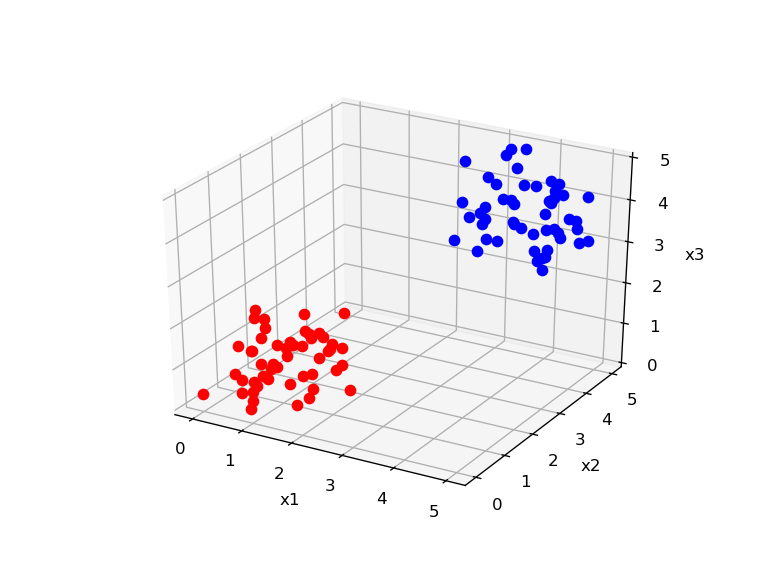

Text(0.5,0,'x3')

In [5]:
# Plot resulting clusters
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1_group1_data, x2_group1_data, x3_group1_data, 'bo ')
ax.plot(x1_group2_data, x2_group2_data, x3_group2_data, 'ro')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

## 3 Artificial Neuron

Most implementation parts of the tensorflow artificial neuron model are equal to the previous notebook. They shall therefore not be explained again. 

The largest difference between Practical Session Part II and this notebook is the number of inputs to the artificial neuron: While the previous notebook used two inputs to the neuron and made the neuron estimate the third dimension (i.e. a regression), we will now teach the neuron to deduce a class label from a three dimensional input (i.e. classification). Furthermore, the activation function is changed from an identify activation to a sigmoid activation. Therefore, the computational graph of the artificial neuron in this exercise is slightly different than the one in the last exercise. It shall therefore be shown in section 3.1, before a tensorflow implementation of the graph is carried out in section 3.2 

### 3.1 Computational Graph

The computational graph used to generate an artifical neuron capable of performing binary classification tasks is depicted below:

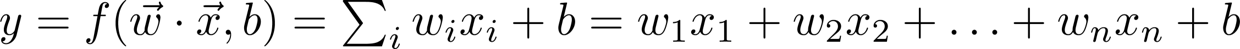

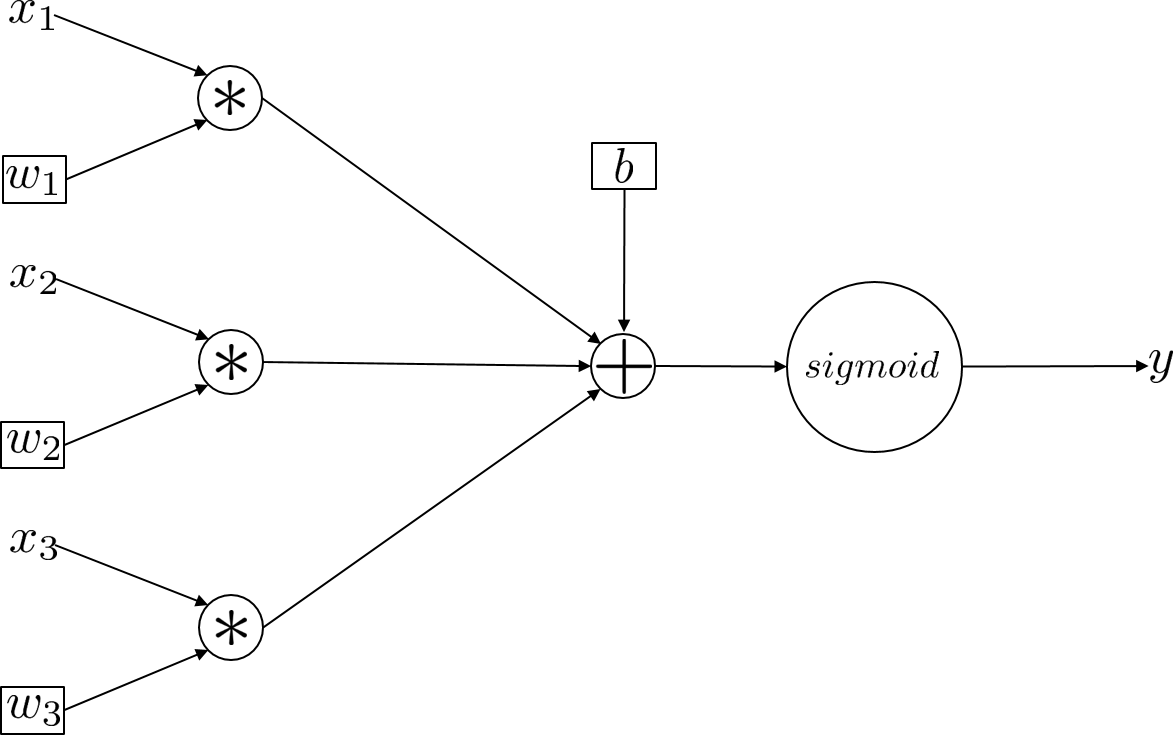

### 3.2 Tensorflow Translation

The translation of the computational graph depicted above works just like the translations in the other parts of this practical session. 

Please note however that y_hat, the expected output of the neuron is now given by a dataset of class labels. It shall therefore be called label instead of y_hat.

In [6]:
# Define placeholders (Inputs)
x1 = tf.placeholder(tf.float32, shape=[None, 1], name = "x1")
x2 = tf.placeholder(tf.float32, shape=[None, 1], name = "x2")
x3 = tf.placeholder(tf.float32, shape=[None, 1], name = "x3")

# Define placeholder (Expected Output / Class label)
label = tf.placeholder(tf.float32, shape = [None, 1], name = "label")

# Define weights
w1 = tf.Variable(0.0, name = "w1")
w2 = tf.Variable(0.0, name = "w2")
w3 = tf.Variable(0.0, name = "w3")

# Define Bias
b = tf.Variable(0.0, name = "b")

# Define Neuron operations without activiation function
wx1 = tf.multiply(w1, x1, name = "wx1")
wx2 = tf.multiply(w2, x2, name = "wx2")
wx3 = tf.multiply(w3, x3, name = "wx3")
y_tilde = tf.add_n((wx1, wx2, wx3))+b

# Define activation function (Sigmoid for binary classification)
y = tf.nn.sigmoid(y_tilde)

## 4 Training of the Artificial Neuron

The training procedure of the artifical neuron for binary classification is nearly the same as in the previous example. Loss function (section 4.1) and optimizer (section 4.2) work exactly like the ones used in Practical Session Part II. If there are open questions regarding these aspects, please consult the previous notebooks.

A little addition is made regarding quality assessment (section 4.3): In order to measure the classification quality, an accuracy operation is added to the tensorflow graph. 

### 4.1 Loss Function

The loss function is the same loss function as in the two previous notebooks of this practical session.

In [7]:
# Define constant
c = tf.constant(0.5, name = "c")

# Define loss function (see other jupyter notebook)
o1 = tf.negative(label)
o2 = tf.add(o1, y)
o3 = tf.math.pow(o2, 2)
o4 = tf.multiply(o3, c)
L = o4

### 4.2 Optimizer

The optimizer is the same optimizer as in the previous notebook of this practical session.

In [8]:
LEARNING_RATE = 0.03

optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE).minimize(tf.reduce_mean(L))

### 4.3 Accuracy

To assess the quality of a classifier, the accuracy is calculated. The accuracy compares the number of correctly classified samples to the total number of samples (i.e. it calculates the relative amount of correct classifications).

See the accuracy documentation here: https://www.tensorflow.org/api_docs/python/tf/metrics/accuracy

In [9]:
# Additional Operation to measure accuracy of the classification
predictions = tf.placeholder(tf.float32, name = "predictions")
accuracy = tf.metrics.accuracy(label, tf.round(predictions)) 

### 4.4 Training

The trainig procedure is equal to the training procedure in Practical Session Part II, except that the accuracy of the classifier is evaluated after each training epoch in addition to the loss. 

In [10]:
# Training Options
EPOCHS = 300 
BATCHSIZE = 3


# Initializer
ini = tf.global_variables_initializer()
ini_l = tf.local_variables_initializer()

loss_history = []
acc_history = []

with tf.Session() as sess:
    
    sess.run(ini_l)
    sess.run(ini)

    for e in range(EPOCHS):
        for index, offset in enumerate(range(0, x1_data.shape[0], BATCHSIZE)):
            
            x1_batch = x1_data[offset: offset + BATCHSIZE]
            x2_batch = x2_data[offset: offset + BATCHSIZE]
            x3_batch = x3_data[offset: offset + BATCHSIZE]
            labels_batch = labels_data[offset: offset + BATCHSIZE]
            
            feed_in = {x1: x1_batch, x2: x2_batch, x3: x3_batch, label: labels_batch}
            
            _, loss, weight1, weight2, weight3, bias  = sess.run([optimizer, L, w1, w2, w3, b], feed_dict = feed_in)
        
        
        # Evaluate accuracy
        pred = sess.run(y, feed_dict = {x1: x1_data, x2: x2_data, x3: x3_data})
        acc = sess.run(accuracy, feed_dict={label: labels_data, predictions: pred})
        
        # Log accuracy history
        acc_history.append(acc)
        
        # Log loss history
        loss_history.append(np.mean(loss))

## 5 Results

The results of the binary classification are visualized in this section. Starting with the loss history (section 5.1), the accuracy (section 5.2) and the overall classification result are depicted. 

### 5.1 Loss History

Text(0,0.5,'Loss')

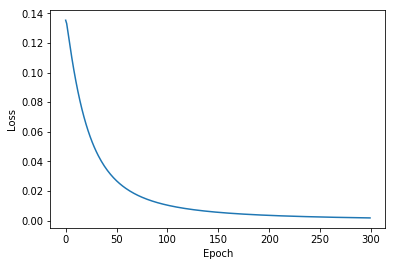

In [11]:
plt.close()
%matplotlib inline
plt.plot(list(range(EPOCHS)), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")

### 5.2 Accuracy

Text(0,0.5,'Accuracy')

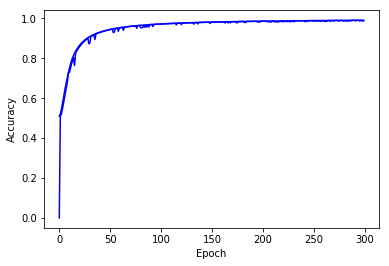

In [12]:
plt.close()
%matplotlib inline
plt.plot(list(range(EPOCHS)), acc_history, color = 'b')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

### 5.3 Visualization

The following code snippet visualizes the classification result. A plane constructed from the weights and bias of the artifical neuron is added to the dataset plot. The plane depicts the class border between the two classes, as it was identified by the artifical neuron in this exercise. A hypothetical point on the class border would be classified as 50% class 0 and 50% class 1 by the neuron. Because of the sigmoid function, each datapoint in a reasonable distance to the separating plane will be associated to one of the classes with almost 100% certainty.

! For unknown reasons, you may have to execute the following code snippet twice to get an interactive figure. I am happy if someone finds the bug !

<IPython.core.display.Javascript object>


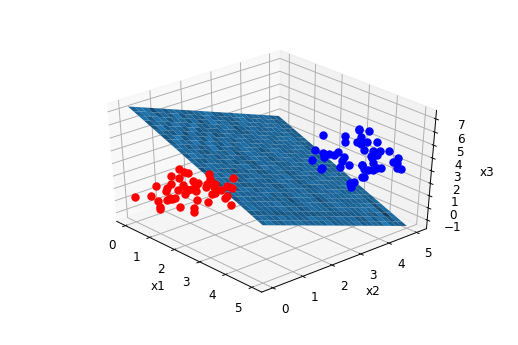

Text(0.5,0,'x3')

In [15]:
%matplotlib notebook
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1_group1_data, x2_group1_data, x3_group1_data, 'bo ')
ax.plot(x1_group2_data, x2_group2_data, x3_group2_data, 'ro')

# Plotting the class separating plane generated by the artifical neuron
surf_x1, surf_x2 = np.meshgrid(np.linspace(0, 5, 51), np.linspace(0, 5, 51))
surf_x3 = (0.5 - weight1*surf_x1 - weight2 * surf_x2 - bias) / weight3
ax.plot_surface(surf_x1, surf_x2, surf_x3)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

## 6 Evaluation

Please evaluate the "Introduction to Neural Networks" practical sessions and lecture using either the link: 

https://evasys.zv.tum.de/evasys/online.php?p=AIAT-7

or the QR code:

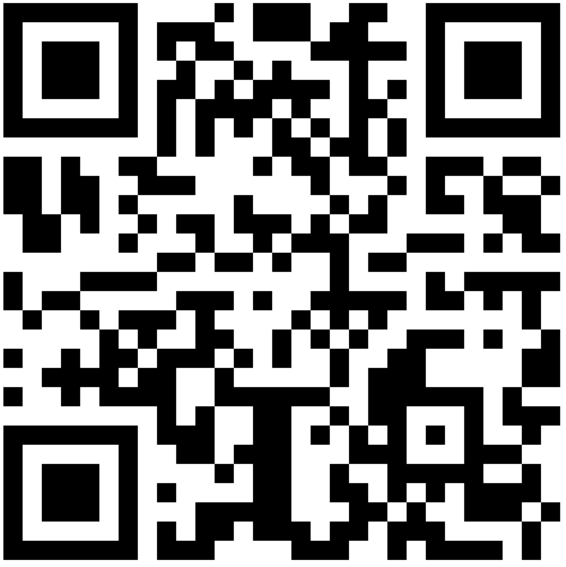